In [1]:
import os
import librosa #python librosa install needed
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_file = "path/00000.wav" #this is one of the 1 sec audio files from the Dataset


In [3]:
ipd.Audio(test_file)#play the audio file

In [4]:
# load audio files with librosa for the stft on jupyter in here (this is to compare our npy output result from batch spectogram execution code with the resulting spectogram in this single item test
#stft demonstration)
test, sr = librosa.load(test_file,sr=None)


In [5]:
print(sr) # sr=None to keep original sampling rate

16000


In [6]:
# display power spectrogram (here we load the existing batch save result)
spec_array = np.load('00000.wav.npy')

In [7]:
spec_array.shape #size of our current(batch execute) npy array

(200, 101)

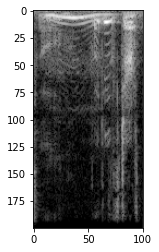

In [8]:
#easiest visualization method in pyplot, this is how it is sized and looks without setting plotting parameters  

plt.imshow(spec_array, cmap='gray')
plt.show()


In [9]:
FRAME_SIZE = 400 #the values we initially set to our batch executed npy files
HOP_SIZE = 160
#sr = 16000

In [10]:
type(spec_array[0][0]) #shows type of array: float or complex etc.it is float32 after absolute square applied during stft

numpy.float32

In [32]:
def plot_spectrogram(spec, sr, hop_length, y_axis="linear"): #i applied the plotting function as he described
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(spec, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis,cmap='viridis') # i used viridis color map instead of red one like them default is cmap='plasma'
    plt.colorbar(format="%+2.f")

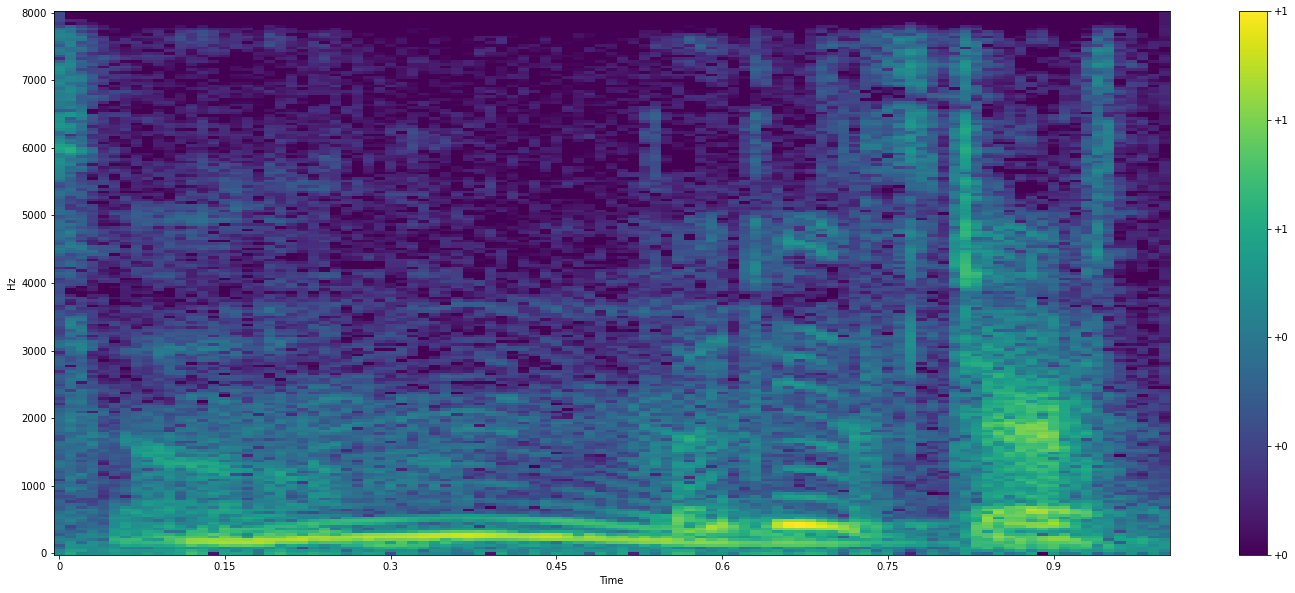

In [33]:
plot_spectrogram(spec_array, sr, HOP_SIZE) #here's the linear result

In [34]:
#spec_log_array = librosa.power_to_db(spec_array)  #i skipped this amplification for our npy file i think it's already amplified
#plot_spectrogram(spec_log_array, sr, HOP_SIZE)

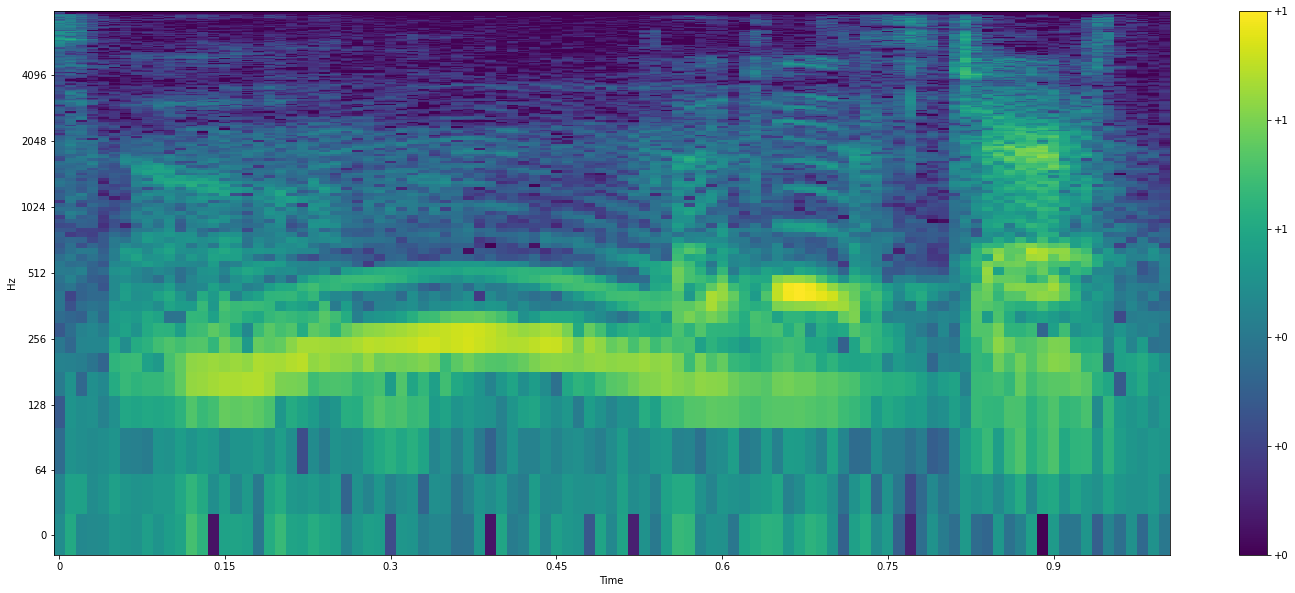

In [35]:
plot_spectrogram(spec_array, sr, HOP_SIZE, y_axis="log") #frequency to time view logarithmic

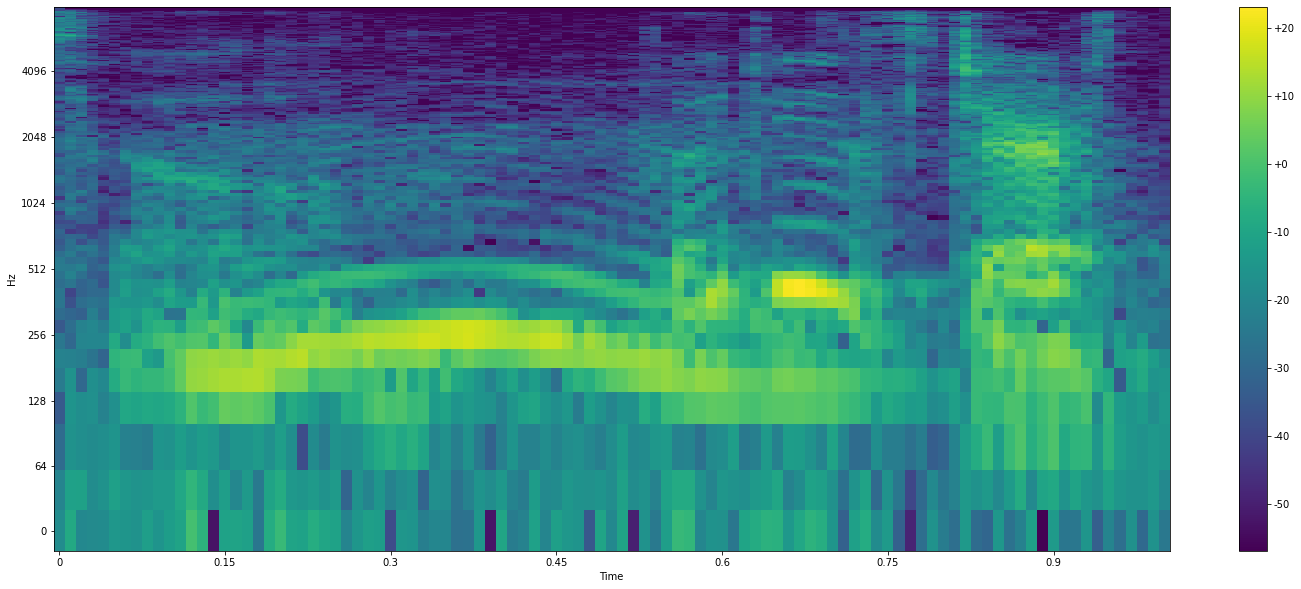

In [36]:
 #here i do the stft to the same audio file so this is
 #what our code pretty much did. The result is quite identical
test_file = librosa.stft(test, n_fft=FRAME_SIZE, hop_length=HOP_SIZE) 
Y_test = librosa.power_to_db(np.abs(test_file) ** 2)
plot_spectrogram(Y_test, sr, HOP_SIZE, y_axis="log")

In [37]:
FRAME_SIZE_2 = 200 #here you can play with the parameters to see different results and effects
HOP_SIZE_2 = 256

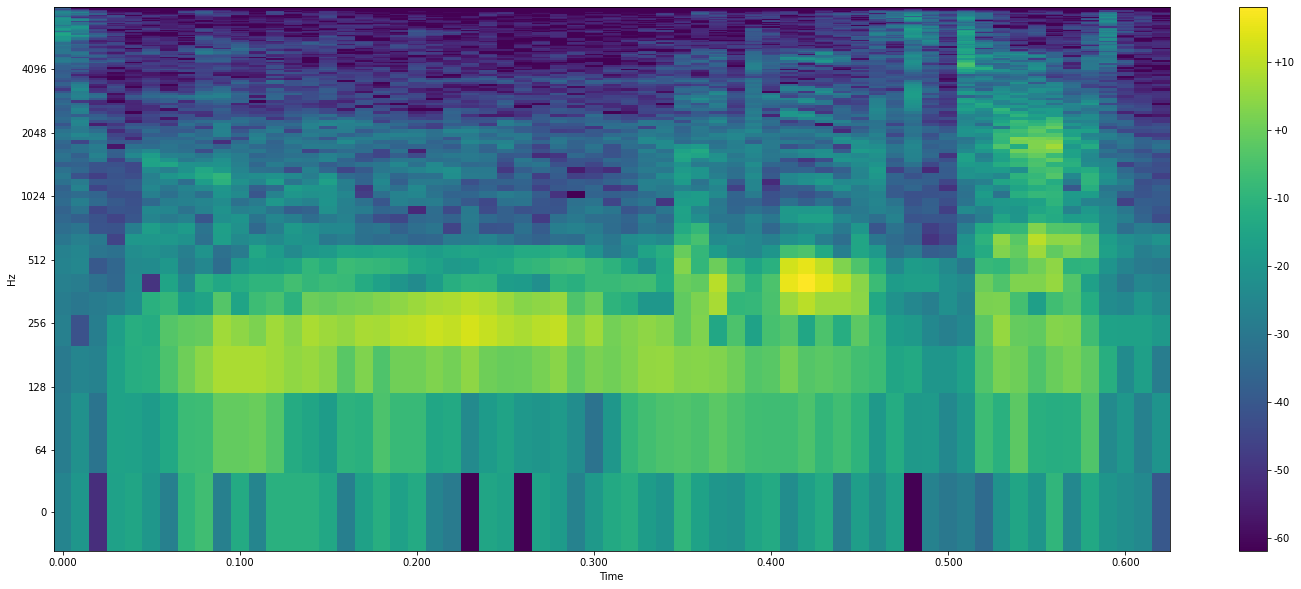

In [38]:
test_file_2 = librosa.stft(test, n_fft=FRAME_SIZE_2, hop_length=HOP_SIZE_2) #here newly set parameters
Y_test_2 = librosa.power_to_db(np.abs(test_file_2) ** 2) #db increase
plot_spectrogram(Y_test_2, sr, HOP_SIZE, y_axis="log") #visualization of the new spectogram in freq x time


In [39]:
Y_test_2.shape #size of the new stft array

(101, 63)

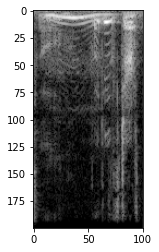

In [40]:
plt.imshow(spec_array, cmap='gray')
plt.show()

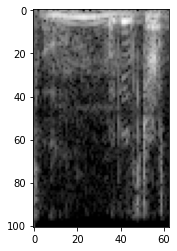

In [41]:
plt.imshow(Y_test_2, cmap='gray')
plt.show()